In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
dataset = pd.read_excel('Datakaryawan.xls')
x = dataset.iloc[:, [1,4]].values
y = dataset.iloc[:, -1].values

In [96]:
print(y)

[0 2 0 1 2 0 1 2 0 2 0 2 0 1 2 0 1 2 0 1 0 2 0 1 2 0 1 2 0 1 0 2 0 1 2 0 1
 2 0 1 0 2 0 1 2 0 1 2 0 1]


In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [98]:
print(x_train)

[[23  1]
 [46 19]
 [27  3]
 [23  1]
 [42 15]
 [49 22]
 [31  6]
 [41 14]
 [38 11]
 [39 12]
 [34  6]
 [41 14]
 [37 10]
 [33  7]
 [45 20]
 [32  7]
 [43 16]
 [39 12]
 [25  2]
 [37 10]
 [29  5]
 [28  4]
 [38 11]
 [25  2]
 [26  3]
 [33  5]
 [33  7]
 [34  6]
 [22  1]
 [30  5]
 [29  4]
 [30  5]
 [36  8]
 [31  6]
 [35  8]
 [28  4]
 [26  3]]


In [99]:
print(x_test)

[[47 20]
 [26  3]
 [36  9]
 [21  1]
 [42 15]
 [27  3]
 [48 21]
 [24  2]
 [40 13]
 [24  2]
 [32  7]
 [44 17]
 [35  8]]


In [100]:
print(y_train)

[2 0 2 2 0 0 1 0 0 0 1 0 0 1 0 1 0 0 2 0 1 2 0 2 2 1 1 1 2 1 2 1 1 1 0 2 2]


In [101]:
print(y_test)

[0 2 0 2 0 2 0 2 0 2 1 0 1]


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [105]:
print(x_train)

[[-1.52910686 -1.27829331]
 [ 1.83334776  2.02148709]
 [-0.94433214 -0.91165104]
 [-1.52910686 -1.27829331]
 [ 1.24857305  1.28820256]
 [ 2.2719288   2.57145049]
 [-0.35955743 -0.36168764]
 [ 1.10237937  1.10488142]
 [ 0.66379833  0.55491802]
 [ 0.80999201  0.73823916]
 [ 0.07902361 -0.36168764]
 [ 1.10237937  1.10488142]
 [ 0.51760465  0.37159689]
 [-0.06717007 -0.17836651]
 [ 1.68715408  2.20480822]
 [-0.21336375 -0.17836651]
 [ 1.39476672  1.47152369]
 [ 0.80999201  0.73823916]
 [-1.2367195  -1.09497217]
 [ 0.51760465  0.37159689]
 [-0.65194479 -0.54500877]
 [-0.79813847 -0.72832991]
 [ 0.66379833  0.55491802]
 [-1.2367195  -1.09497217]
 [-1.09052582 -0.91165104]
 [-0.06717007 -0.54500877]
 [-0.06717007 -0.17836651]
 [ 0.07902361 -0.36168764]
 [-1.67530054 -1.27829331]
 [-0.50575111 -0.54500877]
 [-0.65194479 -0.72832991]
 [-0.50575111 -0.54500877]
 [ 0.37141097  0.00495463]
 [-0.35955743 -0.36168764]
 [ 0.22521729  0.00495463]
 [-0.79813847 -0.72832991]
 [-1.09052582 -0.91165104]]


In [106]:
print(x_test)

[[ 1.40907316  1.54981111]
 [-0.92230243 -0.91427706]
 [ 0.18787642 -0.04459888]
 [-1.47739186 -1.20416978]
 [ 0.85398373  0.82507929]
 [-0.81128455 -0.91427706]
 [ 1.52009104  1.69475747]
 [-1.1443382  -1.05922342]
 [ 0.63194796  0.53518657]
 [-1.1443382  -1.05922342]
 [-0.25619512 -0.33449161]
 [ 1.0760195   1.11497202]
 [ 0.07685854 -0.18954524]]


In [107]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [108]:
y_pred = classifier.predict(x_test)

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5 1 0]
 [0 2 0]
 [0 0 5]]


<ipython-input-112-676bcee16a40>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


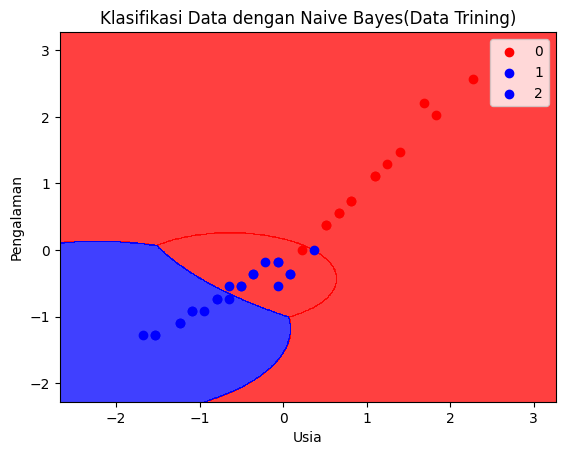

In [112]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop=x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha=0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Trining)')
plt.xlabel('Usia')
plt.ylabel('Pengalaman')
plt.legend()
plt.show()

<ipython-input-113-c5b322b55573>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


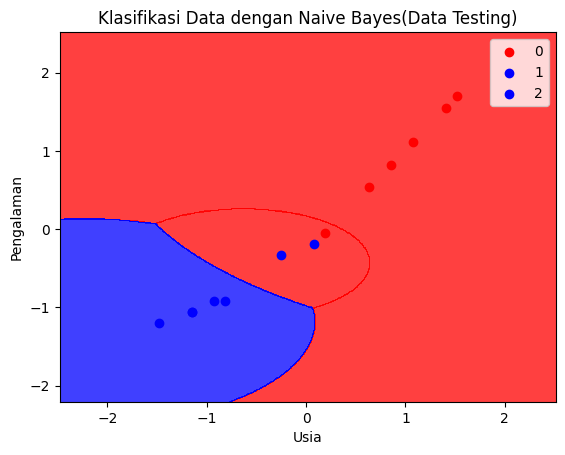

In [113]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop=x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha=0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Testing)')
plt.xlabel('Usia')
plt.ylabel('Pengalaman')
plt.legend()
plt.show()